# INFO 432 Final Project
# Group 4 (Kevin Shi, Kathryn Swatek, Richardson Chhin)
# FIFA 22 Complete Player Dataset
(https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv)

# Load Dataset

In [ ]:
install.packages("psych")
install.packages("skimr")
install.packages("corrplot")
install.packages("GGally")
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readr)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(psych)
library(skimr)
library(corrplot)
library(GGally)
library(janitor)

In [ ]:
#setwd("/content/drive/MyDrive/INFO\\ 432\\ Project/")
fifa22 <- read_csv("players_22.csv")

Rows: 19239 Columns: 110
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (48): player_url, short_name, long_name, player_positions, club_name, l...
dbl  (60): sofifa_id, overall, potential, value_eur, wage_eur, age, height_c...
date  (2): dob, club_joined

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Problem 1: Project Proposal & EDA

### Cleaning

In [ ]:
glimpse(fifa22)
cat("Total rows in dataset:", nrow(fifa22), "\n")

Rows: 19,239
Columns: 110
$ sofifa_id                   <dbl> 158023, 188545, 20801, 190871, 192985, 200…
$ player_url                  <chr> "https://sofifa.com/player/158023/lionel-m…
$ short_name                  <chr> "L. Messi", "R. Lewandowski", "Cristiano R…
$ long_name                   <chr> "Lionel Andrés Messi Cuccittini", "Robert …
$ player_positions            <chr> "RW, ST, CF", "ST", "ST, LW", "LW, CAM", "…
$ overall                     <dbl> 93, 92, 91, 91, 91, 91, 91, 90, 90, 90, 90…
$ potential                   <dbl> 93, 92, 91, 91, 91, 93, 95, 90, 92, 90, 90…
$ value_eur                   <dbl> 78000000, 119500000, 45000000, 129000000, …
$ wage_eur                    <dbl> 320000, 270000, 270000, 270000, 350000, 13…
$ age                         <dbl> 34, 32, 36, 29, 30, 28, 22, 35, 29, 27, 30…
$ dob                         <date> 1987-06-24, 1988-08-21, 1985-02-05, 1992-…
$ height_cm                   <dbl> 170, 185, 187, 175, 181, 188, 182, 193, 18…
$ weight_kg   

In [ ]:
missing_summary <- fifa22 %>%
  select(
    overall, potential, age, height_cm, weight_kg, value_eur, wage_eur,
    pace, shooting, passing, dribbling, defending, physic
  ) %>%
  summarise_all(~sum(is.na(.))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "missing_count") %>%
  mutate(missing_percent = round(missing_count / nrow(fifa22) * 100, 1))

cat("Missing values in key variables:\n")
print(missing_summary)

Missing values in key variables:
# A tibble: 13 × 3
   variable  missing_count missing_percent
   <chr>             <int>           <dbl>
 1 overall               0             0  
 2 potential             0             0  
 3 age                   0             0  
 4 height_cm             0             0  
 5 weight_kg             0             0  
 6 value_eur            74             0.4
 7 wage_eur             61             0.3
 8 pace               2132            11.1
 9 shooting           2132            11.1
10 passing            2132            11.1
11 dribbling          2132            11.1
12 defending          2132            11.1
13 physic             2132            11.1


In [ ]:
fifa22_numeric <- fifa22 %>%
  select(
    #Core metrics
    overall, potential, age, height_cm, weight_kg,
    weak_foot, skill_moves, international_reputation,
    #Main skill categories
    pace, shooting, passing, dribbling, defending, physic,
    #Detailed attributes
    starts_with("attacking_"),
    starts_with("skill_"),
    starts_with("movement_"),
    starts_with("power_"),
    starts_with("mentality_"),
    starts_with("defending_"),
    starts_with("goalkeeping_")
  ) %>%
  select(where(is.numeric))

#Check which columns actually exist
cat("Available numeric columns:\n")
print(colnames(fifa22_numeric))

Available numeric columns:
 [1] "overall"                     "potential"                  
 [3] "age"                         "height_cm"                  
 [5] "weight_kg"                   "weak_foot"                  
 [7] "skill_moves"                 "international_reputation"   
 [9] "pace"                        "shooting"                   
[11] "passing"                     "dribbling"                  
[13] "defending"                   "physic"                     
[15] "attacking_crossing"          "attacking_finishing"        
[17] "attacking_heading_accuracy"  "attacking_short_passing"    
[19] "attacking_volleys"           "skill_dribbling"            
[21] "skill_curve"                 "skill_fk_accuracy"          
[23] "skill_long_passing"          "skill_ball_control"         
[25] "movement_acceleration"       "movement_sprint_speed"      
[27] "movement_agility"            "movement_reactions"         
[29] "movement_balance"            "power_shot_power"          

In [ ]:
#Check missing values in this subset
missing_check <- fifa22_numeric %>%
  summarise_all(~sum(is.na(.))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "missing_count") %>%
  mutate(missing_percent = round(missing_count / nrow(fifa22) * 100, 1)) %>%
  arrange(missing_percent)

cat("\nMissing values summary:\n")
print(missing_check)


Missing values summary:
# A tibble: 49 × 3
   variable                 missing_count missing_percent
   <chr>                            <int>           <dbl>
 1 overall                              0               0
 2 potential                            0               0
 3 age                                  0               0
 4 height_cm                            0               0
 5 weight_kg                            0               0
 6 weak_foot                            0               0
 7 skill_moves                          0               0
 8 international_reputation             0               0
 9 attacking_crossing                   0               0
10 attacking_finishing                  0               0
# ℹ 39 more rows


In [ ]:
#Keep only columns with less than 20% missing values
good_columns <- missing_check %>%
  filter(missing_percent < 20) %>%
  pull(variable)

cat("Columns with <20% missing values:\n")
print(good_columns)

Columns with <20% missing values:
 [1] "overall"                     "potential"                  
 [3] "age"                         "height_cm"                  
 [5] "weight_kg"                   "weak_foot"                  
 [7] "skill_moves"                 "international_reputation"   
 [9] "attacking_crossing"          "attacking_finishing"        
[11] "attacking_heading_accuracy"  "attacking_short_passing"    
[13] "attacking_volleys"           "skill_dribbling"            
[15] "skill_curve"                 "skill_fk_accuracy"          
[17] "skill_long_passing"          "skill_ball_control"         
[19] "movement_acceleration"       "movement_sprint_speed"      
[21] "movement_agility"            "movement_reactions"         
[23] "movement_balance"            "power_shot_power"           
[25] "power_jumping"               "power_stamina"              
[27] "power_strength"              "power_long_shots"           
[29] "mentality_aggression"        "mentality_intercepti

In [ ]:
#Create final skill variables dataset
skill_vars <- fifa22_numeric %>%
  select(all_of(good_columns)) %>%
  drop_na()  #Remove rows with any missing values in these columns

cat("Dataset dimensions after cleaning:", nrow(skill_vars), "x", ncol(skill_vars), "\n")

Dataset dimensions after cleaning: 17107 x 48 


### Visualizations

In [ ]:
#Clean column names
fifa22_df <- clean_names(fifa22)

#Remove unneeded metadata/IDs
fifa22_df <- fifa22_df %>%
  select(overall, potential, value_eur, wage_eur, age, height_cm, weight_kg,
         preferred_foot, work_rate, body_type, player_positions, pace, shooting,
         passing, dribbling, defending, physic,
         starts_with("attacking_"), starts_with("skill_"), starts_with("movement_"),
         starts_with("power_"), starts_with("mentality_"), starts_with("defending_"),
         starts_with("goalkeeping_"))

#Statistical summary
summary(fifa22_df)

    overall        potential       value_eur           wage_eur     
 Min.   :47.00   Min.   :49.00   Min.   :9.00e+03   Min.   :   500  
 1st Qu.:61.00   1st Qu.:67.00   1st Qu.:4.75e+05   1st Qu.:  1000  
 Median :66.00   Median :71.00   Median :9.75e+05   Median :  3000  
 Mean   :65.77   Mean   :71.08   Mean   :2.85e+06   Mean   :  9018  
 3rd Qu.:70.00   3rd Qu.:75.00   3rd Qu.:2.00e+06   3rd Qu.:  8000  
 Max.   :93.00   Max.   :95.00   Max.   :1.94e+08   Max.   :350000  
                                 NA's   :74         NA's   :61      
      age          height_cm       weight_kg      preferred_foot    
 Min.   :16.00   Min.   :155.0   Min.   : 49.00   Length:19239      
 1st Qu.:21.00   1st Qu.:176.0   1st Qu.: 70.00   Class :character  
 Median :25.00   Median :181.0   Median : 75.00   Mode  :character  
 Mean   :25.21   Mean   :181.3   Mean   : 74.94                     
 3rd Qu.:29.00   3rd Qu.:186.0   3rd Qu.: 80.00                     
 Max.   :54.00   Max.   :206.0   M

In [ ]:
#Numeric variable distributions (subset to core metrics to avoid clutter)
core_numeric <- fifa22_df %>%
  select(overall, potential, value_eur, wage_eur, age, height_cm, weight_kg,
         pace, shooting, passing, dribbling, defending, physic)

Warning message:
“Removed 12927 rows containing non-finite outside the scale range
(`stat_bin()`).”


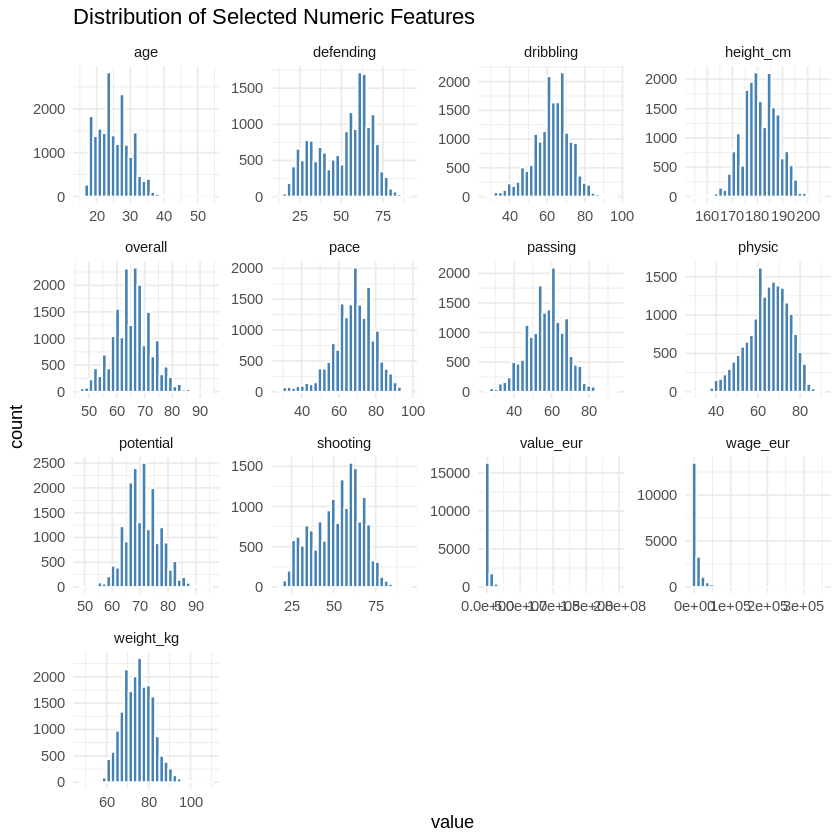

In [ ]:
core_numeric %>%
  pivot_longer(cols = everything()) %>%
  ggplot(aes(value)) +
  facet_wrap(~ name, scales = "free") +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  theme_minimal() +
  labs(title = "Distribution of Selected Numeric Features")

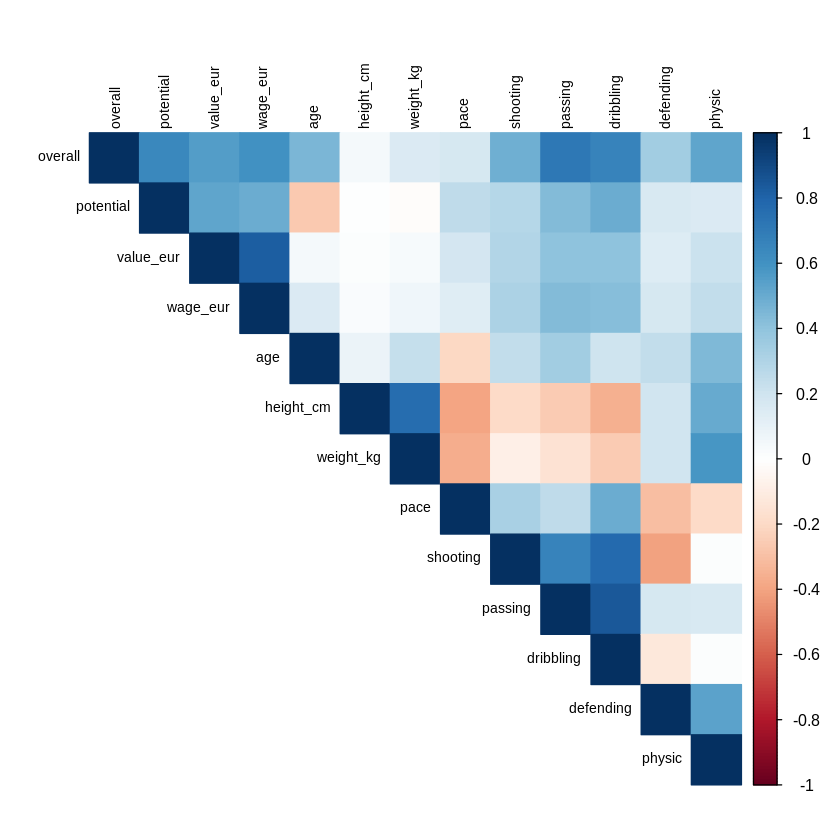

In [ ]:
#Correlation matrix (subset to core performance metrics)
cor_subset <- core_numeric
cor_mat <- cor(cor_subset, use = "pairwise.complete.obs")
corrplot(cor_mat, method = "color", type = "upper", tl.cex = 0.7, tl.col = "black")

Warning message in cor(num_vars, use = "pairwise.complete.obs"):
“the standard deviation is zero”


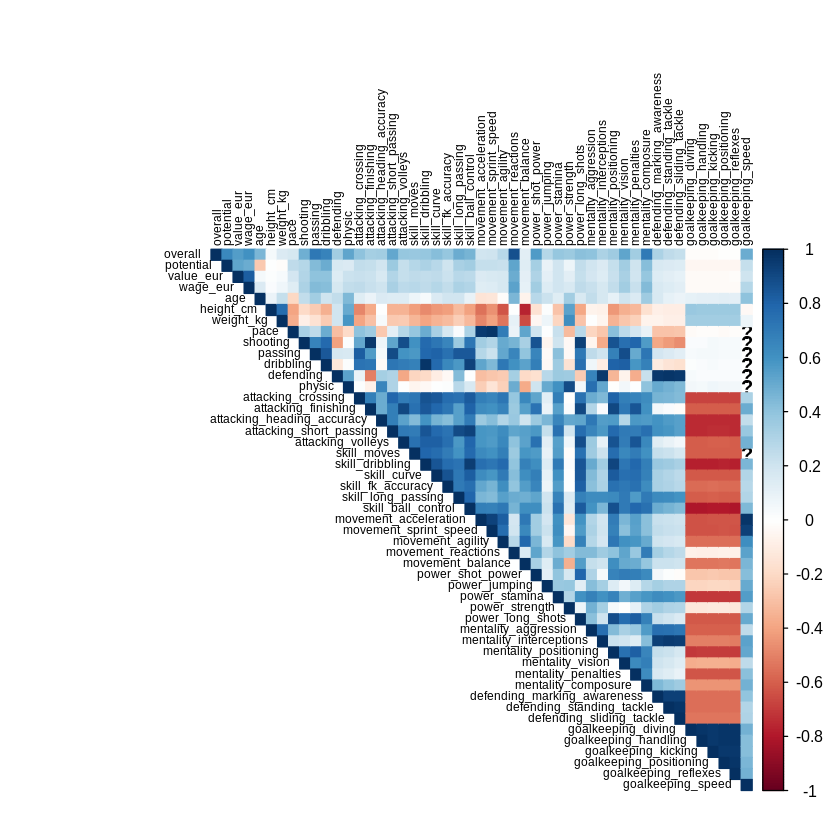

In [ ]:
#Correlation analysis for numeric variables
num_vars <- fifa22_df %>% select(where(is.numeric))
cor_mat <- cor(num_vars, use = "pairwise.complete.obs")
corrplot(cor_mat, method = "color", type = "upper", tl.cex = 0.6, tl.col = "black")

Warning message:
“Removed 61 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


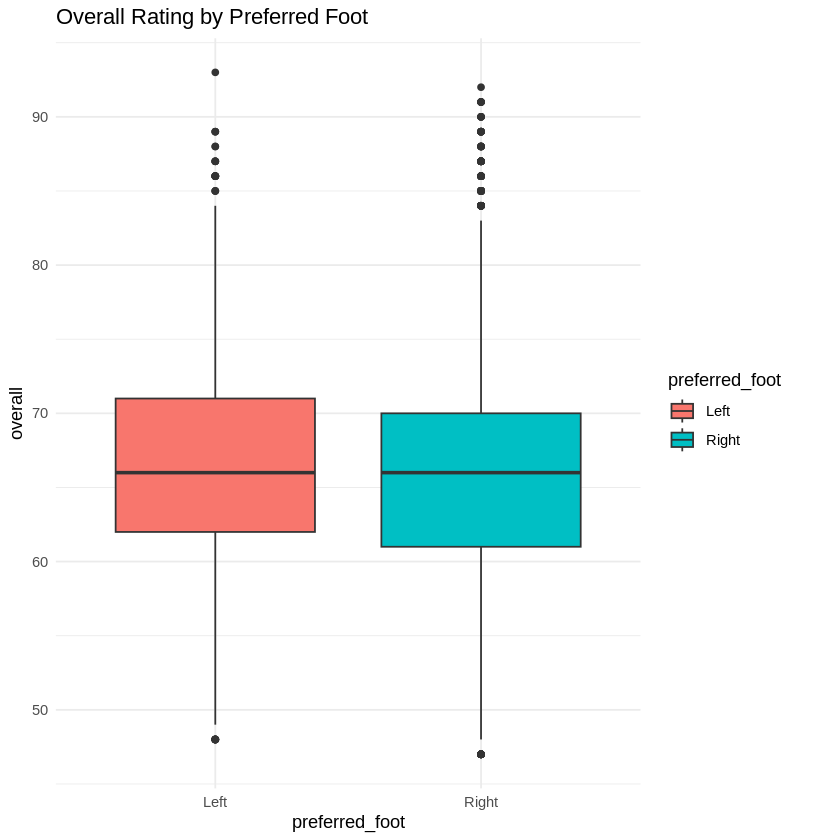

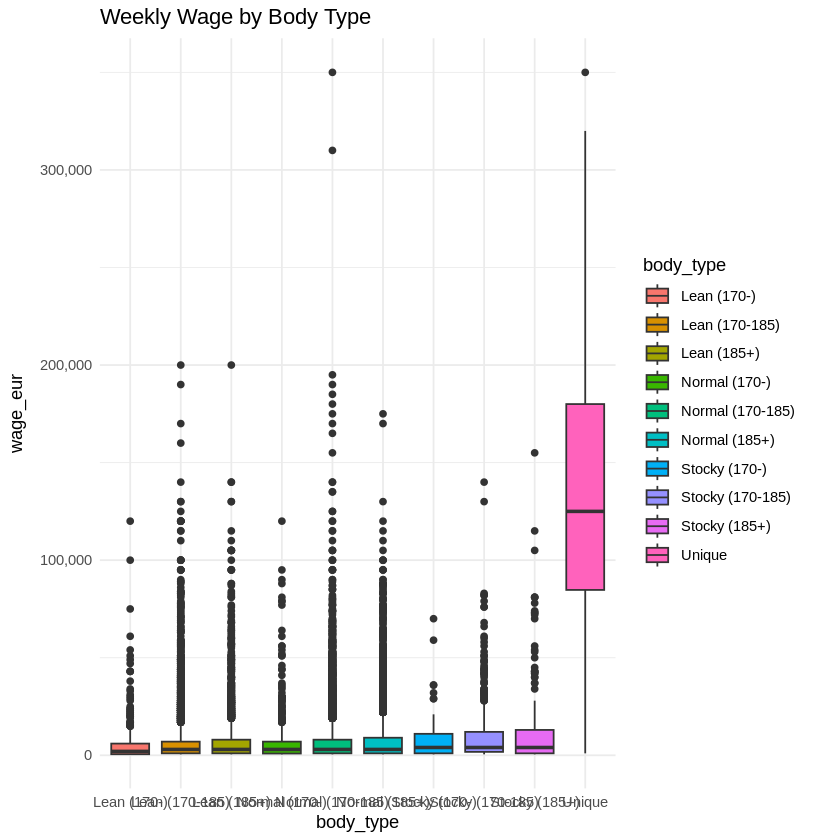

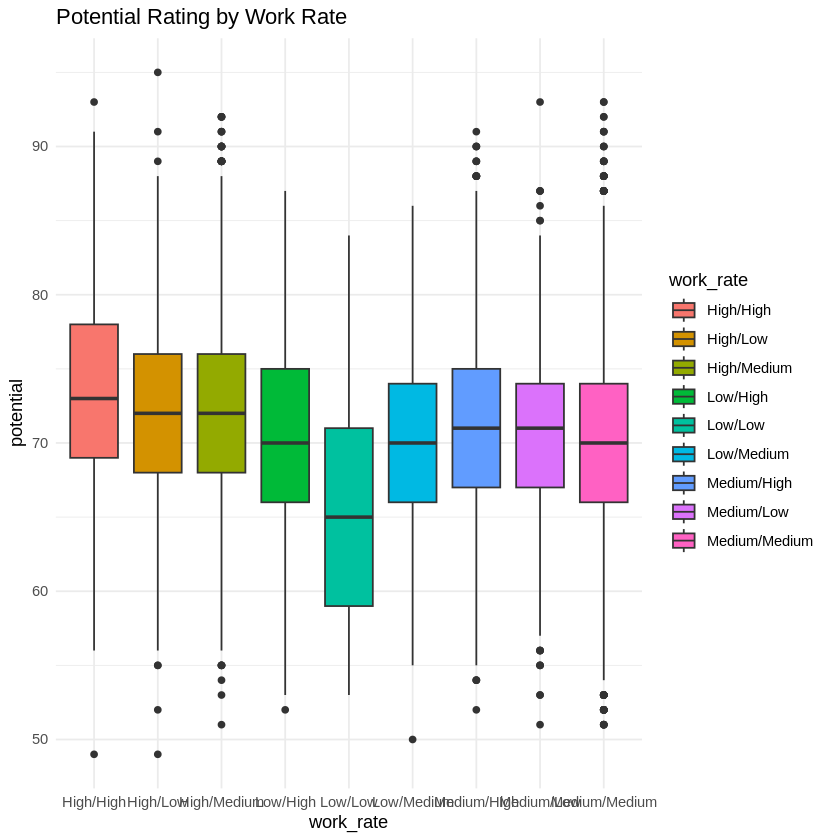

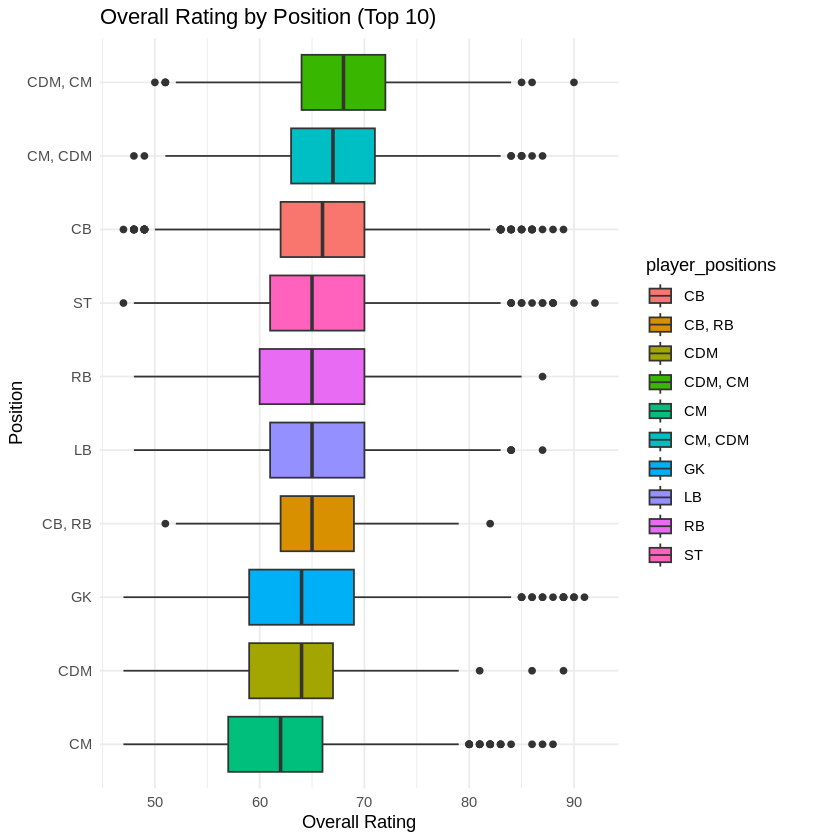

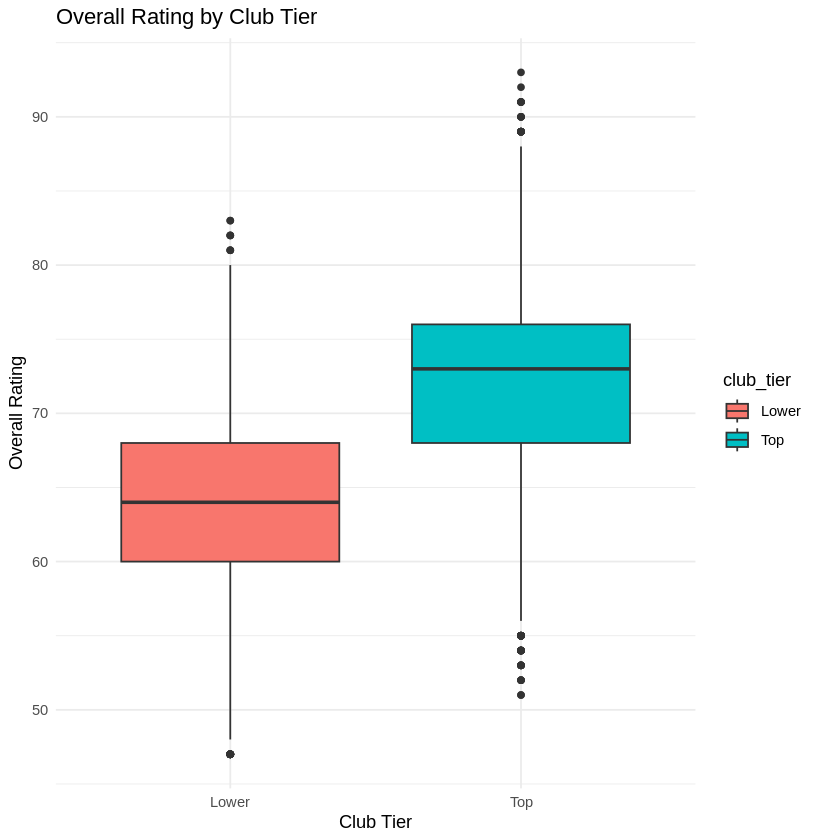

In [ ]:
#Boxplots for categorical vs numeric

# Preferred Foot vs Overall
ggplot(fifa22_df, aes(x = preferred_foot, y = overall, fill = preferred_foot)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Overall Rating by Preferred Foot")

# Body Type vs Wage
ggplot(fifa22_df, aes(x = body_type, y = wage_eur, fill = body_type)) +
  geom_boxplot() +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal() +
  labs(title = "Weekly Wage by Body Type")

# Work Rate vs Potential
ggplot(fifa22_df, aes(x = work_rate, y = potential, fill = work_rate)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Potential Rating by Work Rate")

# Player Position vs Overall (Top 10 positions only)
top_positions <- fifa22_df %>%
  count(player_positions, sort = TRUE) %>%
  slice_head(n = 10) %>%
  pull(player_positions)

fifa22_df %>%
  filter(player_positions %in% top_positions) %>%
  ggplot(aes(x = reorder(player_positions, overall, median), y = overall, fill = player_positions)) +
  geom_boxplot() +
  coord_flip() +
  theme_minimal() +
  labs(title = "Overall Rating by Position (Top 10)",
       x = "Position", y = "Overall Rating")

# Overall Rating vs Club Tier (no direct tier variable -> create one from overall mean rating per club)
club_tiers <- fifa22 %>%
  group_by(club_name) %>%
  summarise(avg_overall = mean(overall, na.rm = TRUE)) %>%
  mutate(club_tier = ifelse(avg_overall >= quantile(avg_overall, 0.75), "Top", "Lower"))

df_rating_vs_club_tier <- fifa22 %>%
  left_join(club_tiers %>% select(club_name, club_tier), by = "club_name")

ggplot(df_rating_vs_club_tier, aes(x = club_tier, y = overall, fill = club_tier)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Overall Rating by Club Tier", x = "Club Tier", y = "Overall Rating")

`geom_smooth()` using formula = 'y ~ x'


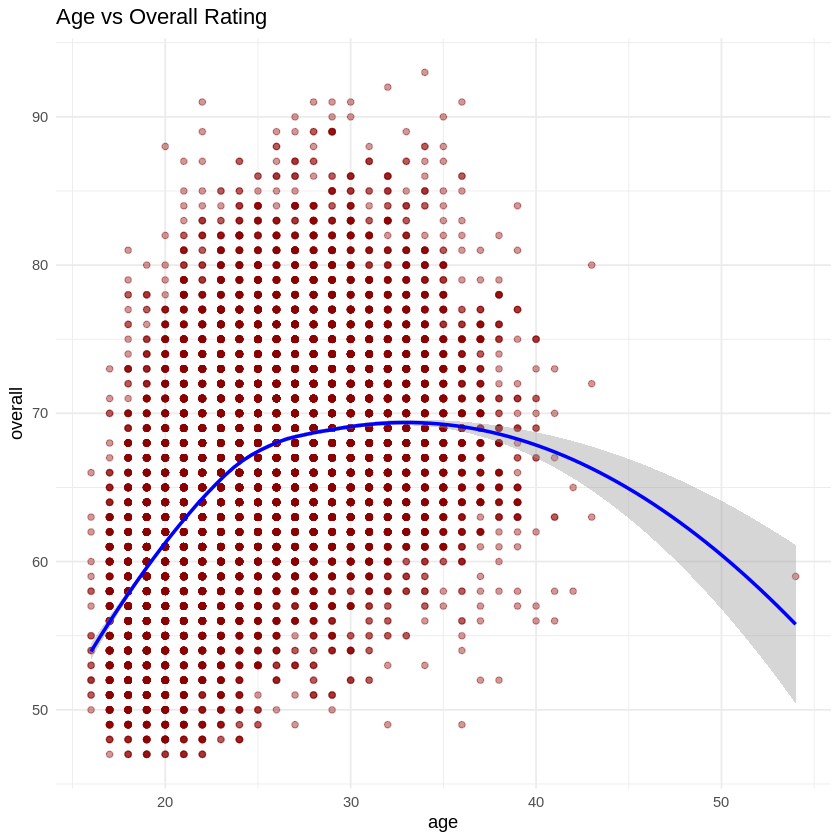

In [ ]:
#Relationship between age and overall rating
ggplot(fifa22_df, aes(x = age, y = overall)) +
  geom_point(alpha = 0.4, color = "darkred") +
  geom_smooth(method = "loess", color = "blue") +
  theme_minimal() +
  labs(title = "Age vs Overall Rating")

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 74 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 61 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 74 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 61 rows containing missing values”
Warning message:
“Removed 74 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 74 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 74 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 74 rows containing missing values”
Warning message in ggally_st

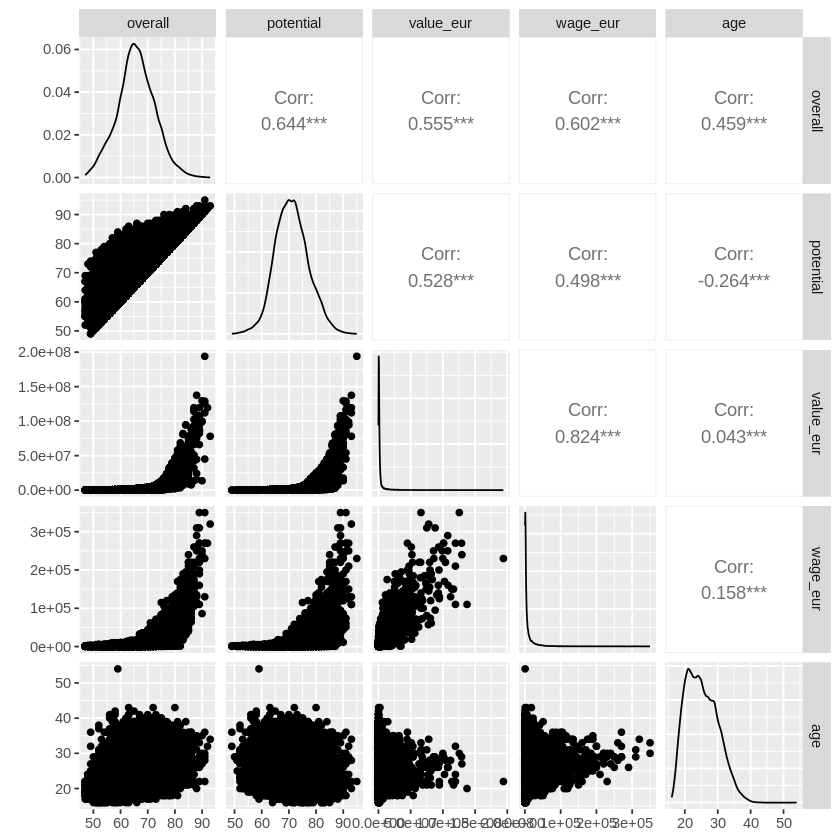

In [ ]:
#Pairwise scatterplots for core performance metrics
ggpairs(fifa22_df %>% select(overall, potential, value_eur, wage_eur, age))

In [ ]:
#unique(fifa22_df$player_positions)

### Statistical Hypotheses

In [ ]:
library(broom)

#### Hypothesis 1
H0: There is no significant difference in average wage across different player positions (i.e., GK, DEF, MID, FWD). <br/>
Ha: At least one player position has a different average wage than the others.

Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


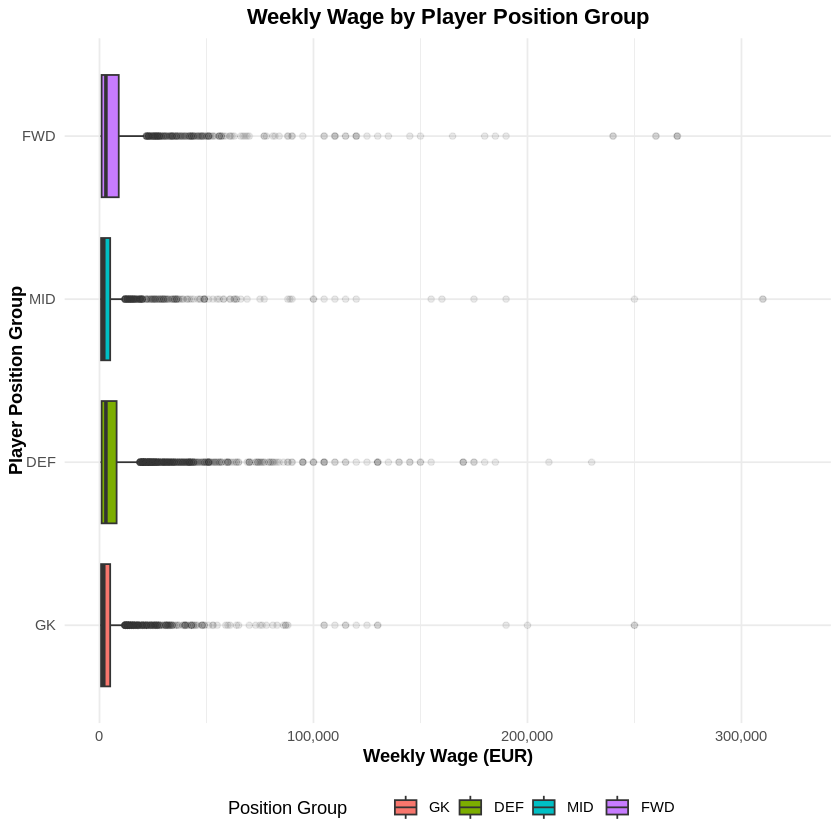

In [ ]:
# Wage vs Player Positions
selected_positions <- c("ST", "RW", "LW", "CF", "CAM", "CM", "RM", "LM",
                        "CDM", "LB", "CB", "RB", "GK")

fifa22_df_grouped <- fifa22_df %>%
  filter(player_positions %in% selected_positions) %>%
  mutate(
    position_group = case_when(
      player_positions == "GK" ~ "GK",
      player_positions %in% c("LB", "CB", "RB") ~ "DEF",
      player_positions %in% c("CDM", "CM", "CAM", "RM", "LM") ~ "MID",
      player_positions %in% c("ST", "RW", "LW", "CF") ~ "FWD",
      TRUE ~ "Other"
    )
  )

fifa22_df_grouped$position_group <- factor(
  fifa22_df_grouped$position_group,
  levels = c("GK", "DEF", "MID", "FWD")
)

ggplot(fifa22_df_grouped, aes(x = reorder(position_group, wage_eur, median),
                             y = wage_eur, fill = position_group)) +
  geom_boxplot(outlier.alpha = 0.1) +
  scale_y_continuous(labels = scales::comma, limits = c(0, max(fifa22_df_grouped$wage_eur, na.rm = TRUE) * 1.05)) +
  coord_flip() +
  theme_minimal() +
  labs(
    title = "Weekly Wage by Player Position Group",
    x = "Player Position Group",
    y = "Weekly Wage (EUR)",
    fill = "Position Group"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.position = "bottom"
  )

In [ ]:
###############################################################
# 1. ANOVA: Wage across player positions (GK, DEF, MID, FWD)  #
###############################################################

#Map detailed positions to general groups
position_map <- list(
  GK = c("GK"),
  DEF = c("RB", "LB", "CB", "RWB", "LWB"),
  MID = c("CDM", "CM", "CAM", "LM", "RM"),
  FWD = c("ST", "CF", "LW", "RW")
)

df <- fifa22_df %>%
  mutate(position_group = case_when(
    player_positions %in% position_map$GK ~ "GK",
    player_positions %in% position_map$DEF ~ "DEF",
    player_positions %in% position_map$MID ~ "MID",
    player_positions %in% position_map$FWD ~ "FWD",
    TRUE ~ NA_character_
  ))

#Remove NAs for ANOVA
df_anova <- df %>% filter(!is.na(position_group))

#Run ANOVA
anova_model <- aov(wage_eur ~ position_group, data = df_anova)
tidy(anova_model)

#Post pairwise comparisons
TukeyHSD(anova_model)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
position_group,3,1.852968e+10,6176561425,17.35705,3.099546e-11
Residuals,9394,3.342884e+12,355853129,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = wage_eur ~ position_group, data = df_anova)

$position_group
              diff        lwr        upr     p adj
FWD-DEF  1158.7480  -191.5466  2509.0426 0.1218957
GK-DEF  -2384.5071 -3708.0518 -1060.9624 0.0000221
MID-DEF -2228.2100 -3669.8124  -786.6077 0.0004181
GK-FWD  -3543.2551 -5054.4824 -2032.0278 0.0000000
MID-FWD -3386.9580 -5002.5862 -1771.3298 0.0000004
MID-GK    156.2971 -1437.0421  1749.6362 0.9943832


ANOVA results:<br/>
* F-statistic: 17.36
* p-value: 3.10 x 10^-11
* We strongly reject H0 (wages differ significantly by at least one position group)

Tukey post-hoc results:<br/>
* FWD-DEF: Not statistically significant (p = 0.12)
* GK vs DEF: GK wages significantly lower than DEF (p = 2.2 x 10^-5)
* MID vs DEF: MID wages significantly lower than DEF (p = 4.18 x 10^-4)
* GK-FWD: GK wages significantly lower than FWD (p is basically 0)
* MID-FWD: MID wages significantly lower than FWD (p = 0.0000004)
* MID-GK: Not statistically significant (p=0.994)

Overall, wages vary by position, mainly because forwards earn more and GKs/MIDs earn less compared to certain groups. DEF and FWD are relatively closer in pay.

#### Hypothesis 2
H0: Preferred foot (left vs. right) is independent of player position. <br/>
Ha: Preferred foot is dependent on player position.

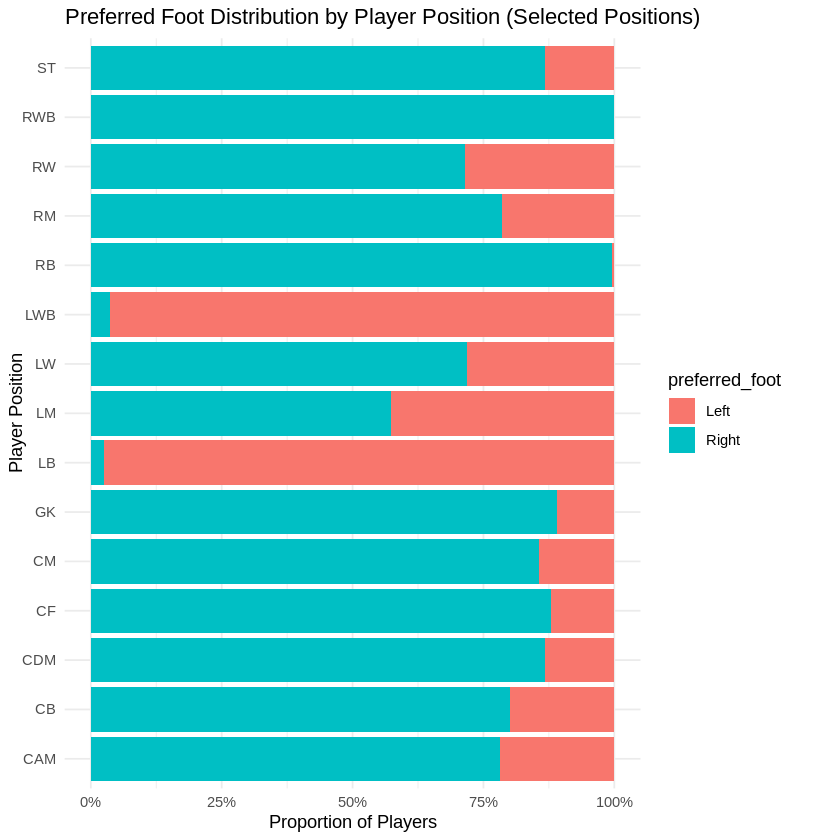

In [ ]:
# Preferred Foot vs Player Positions
selected_positions <- c("ST", "RW", "LW", "CF", "CAM", "CM", "RM", "LM",
                        "CDM", "LB", "CB", "RB", "GK", "RWB", "LWB")

fifa22_df %>%
  filter(player_positions %in% selected_positions) %>%
  ggplot(aes(x = player_positions, fill = preferred_foot)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  coord_flip() +
  theme_minimal() +
  labs(title = "Preferred Foot Distribution by Player Position (Selected Positions)",
       x = "Player Position",
       y = "Proportion of Players")

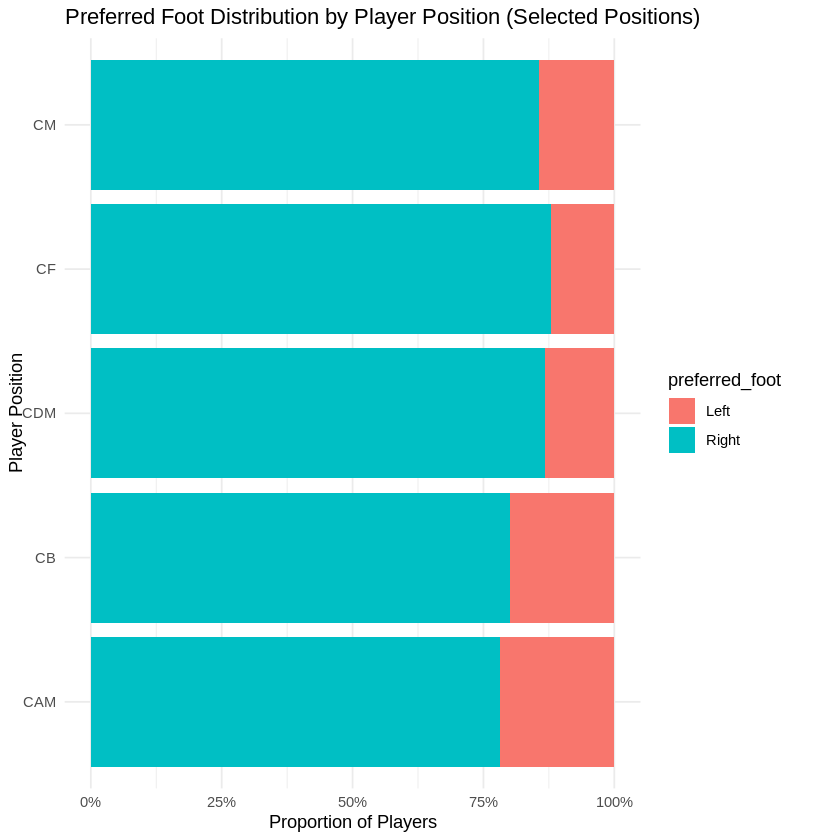

In [ ]:
# Preferred Foot vs Player Positions
selected_positions <- c("CF", "CAM", "CM", "CDM", "CB") #"GK", "ST")
                          #"CDM, CM", "CDM, CB", "CAM, CM", "CM, CB")

fifa22_df %>%
  filter(player_positions %in% selected_positions) %>%
  ggplot(aes(x = player_positions, fill = preferred_foot)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  coord_flip() +
  theme_minimal() +
  labs(title = "Preferred Foot Distribution by Player Position (Selected Positions)",
       x = "Player Position",
       y = "Proportion of Players")

In [ ]:
############################################################
# 2. Chi-squared test: Preferred foot vs player position   #
############################################################
set.seed(123)
#Restrict to selected positions
selected_positions <- c("CF", "CAM", "CM", "CDM", "CB")
                          #"CDM, CM", "CDM, CB", "CAM, CM", "CM, CB")

df_chi <- fifa22_df %>%
  filter(player_positions %in% selected_positions) %>%
  select(preferred_foot, player_positions) %>%
  filter(!is.na(preferred_foot) & !is.na(player_positions))

#Find the smaller group size
min_count <- min(table(df_chi$preferred_foot))

#Balanced sampling
df_balanced <- df_chi %>%
  group_by(preferred_foot) %>%
  sample_n(min_count) %>%
  ungroup()

#Create contingency table
contingency_table <- table(df_balanced$preferred_foot, df_balanced$player_positions)

#Run Chi-squared test
chi_result <- chisq.test(contingency_table)
chi_result


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 13.88, df = 4, p-value = 0.007686


In [ ]:
chisq.test(contingency_table, simulate.p.value = TRUE, B = 10000)


	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  contingency_table
X-squared = 13.88, df = NA, p-value = 0.005099


Chi-squared results:
* X-squared: 13.88
* df: 4
* p-value: ≈ 0.0077

The p-value≈0.0077 is less than alpha=0.05, so we reject H0. We conclude that there is strong evidence that preferred foot is dependent on the player positions tested; certain positions tend to have a higher proportion of left-footed or right-footed players.

#### Hypothesis 3
H0: The average overall rating of players with preferred foot of right is equal to that of players with preferred foot of left. <br/>
Ha: The average overall rating of players with preferred foot of right is not equal to that of players with preferred foot of left.

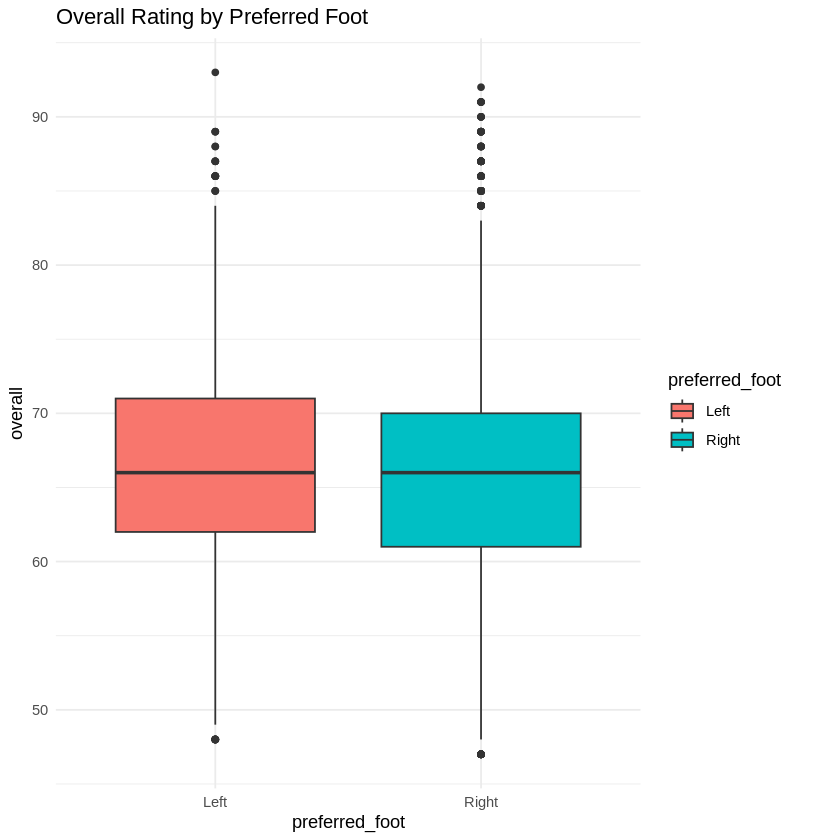

In [ ]:
# Preferred Foot vs Overall
ggplot(fifa22_df, aes(x = preferred_foot, y = overall, fill = preferred_foot)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Overall Rating by Preferred Foot")

In [ ]:
############################################################
# 3. Two-sample t-test: Preferred Foot vs Overall Rating   #
############################################################
set.seed(123)

#Remove NAs
df_balanced <- fifa22_df %>%
  filter(!is.na(preferred_foot) & !is.na(overall))

#Separate into groups
df_left <- df_balanced %>% filter(preferred_foot == "Left")
df_right <- df_balanced %>% filter(preferred_foot == "Right")

n_small <- 50   #smaller sample size per group
df_left_small <- df_left %>% sample_n(n_small)
df_right_small <- df_right %>% sample_n(n_small)

df_small <- bind_rows(df_left_small, df_right_small)

#Run t-test on balanced data
ttest_balanced <- t.test(overall ~ preferred_foot, data = df_small)

ttest_balanced


	Welch Two Sample t-test

data:  overall by preferred_foot
t = 2.2611, df = 92.626, p-value = 0.0261
alternative hypothesis: true difference in means between group Left and group Right is not equal to 0
95 percent confidence interval:
 0.3431807 5.2968193
sample estimates:
 mean in group Left mean in group Right 
              66.52               63.70 


Two-sample t-test results:
* t: 2.26
* p-value: 0.0261
* Mean (Left): 66.52
* Mean (Right): 63.70

Since the p-value=0.0261 is less than alpha=0.05, we reject H0. We conclude that there is strong evidence that the average overall rating of players with preferred foot of right is not equal to that of players with preferred foot of left. It seems as though left-footed players have a slightly higher average overall rating than right-footed players.

# Problem 2: Dimensional Reduction

Successfully created scaled dataset: 17107 x 48 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Variance explained by first 10 PCs:
PC1: 33.0% (Cumulative: 33.0%)
PC2: 19.0% (Cumulative: 52.0%)
PC3: 9.0% (Cumulative: 60.9%)
PC4: 5.1% (Cumulative: 66.0%)
PC5: 3.3% (Cumulative: 69.3%)
PC6: 2.3% (Cumulative: 71.6%)
PC7: 2.2% (Cumulative: 73.8%)
PC8: 2.0% (Cumulative: 75.8%)
PC9: 2.0% (Cumulative: 77.8%)
PC10: 2.0% (Cumulative: 79.7%)


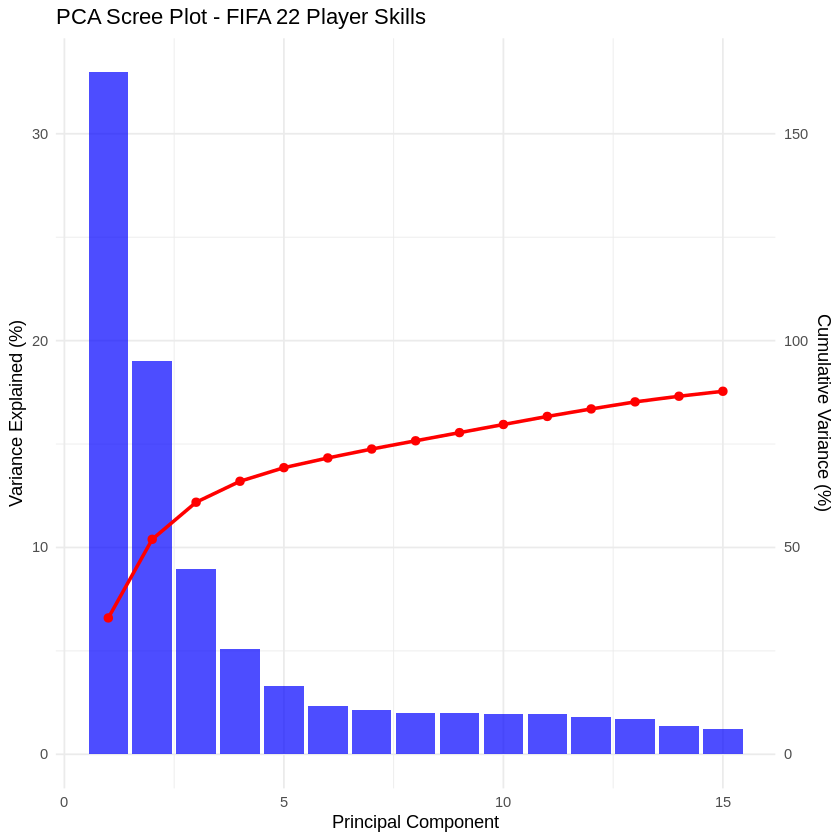


Top 10 loadings for PC1:
                                   Variable Loading
dribbling                         dribbling  -0.239
skill_dribbling             skill_dribbling  -0.228
skill_ball_control       skill_ball_control  -0.225
passing                             passing  -0.223
shooting                           shooting  -0.222
mentality_vision           mentality_vision  -0.219
power_long_shots           power_long_shots  -0.217
mentality_positioning mentality_positioning  -0.216
skill_curve                     skill_curve  -0.213
attacking_finishing     attacking_finishing  -0.204

Top 10 loadings for PC2:
                                               Variable Loading
defending                                     defending   0.290
mentality_interceptions         mentality_interceptions   0.279
defending_marking_awareness defending_marking_awareness   0.278
defending_standing_tackle     defending_standing_tackle   0.271
physic                                           physic 

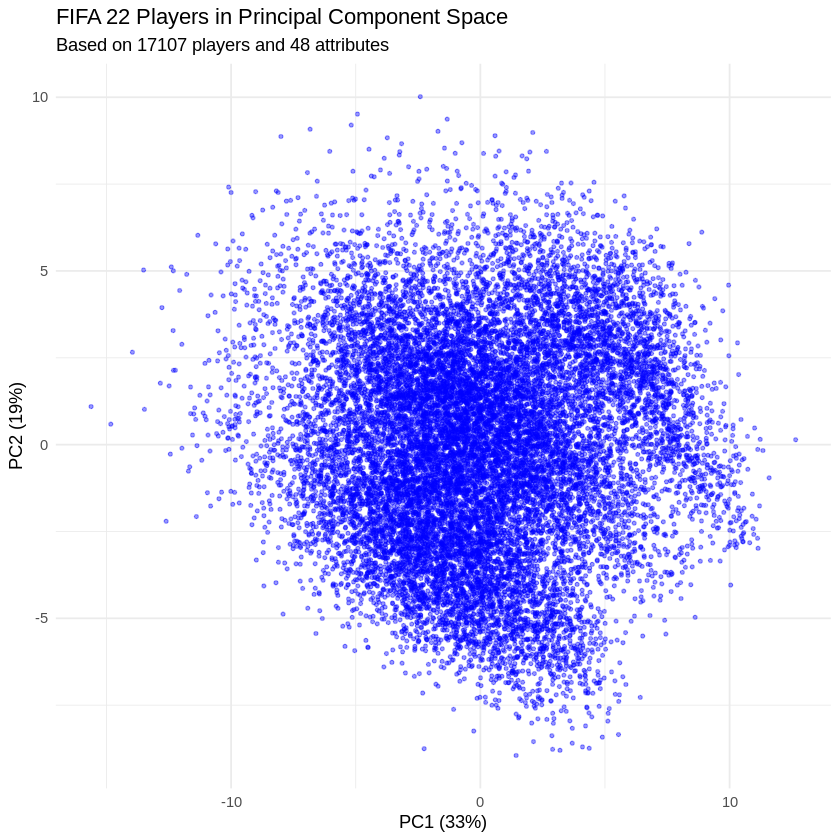

In [ ]:
#PCA

#Get row indices that have complete cases for later joining
complete_rows <- which(complete.cases(fifa22 %>% select(all_of(good_columns))))

#Standardize the data for PCA and Factor Analysis
skill_scaled <- scale(skill_vars)

cat("Successfully created scaled dataset:", nrow(skill_vars), "x", ncol(skill_vars), "\n")

#Perform PCA using prcomp
pca_result <- prcomp(skill_scaled, center = TRUE, scale. = TRUE)

#Calculate variance explained
var_explained <- pca_result$sdev^2 / sum(pca_result$sdev^2)
cumvar_explained <- cumsum(var_explained)

#Create scree plot
scree_data <- data.frame(
  PC = 1:length(var_explained),
  Variance = var_explained * 100,
  Cumulative = cumvar_explained * 100
)

ggplot(scree_data[1:15,], aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  geom_line(aes(y = Cumulative/5), color = "red", size = 1) +
  geom_point(aes(y = Cumulative/5), color = "red", size = 2) +
  scale_y_continuous(
    name = "Variance Explained (%)",
    sec.axis = sec_axis(~.*5, name = "Cumulative Variance (%)")
  ) +
  labs(title = "PCA Scree Plot - FIFA 22 Player Skills",
       x = "Principal Component") +
  theme_minimal()

#Print variance summary
cat("Variance explained by first 10 PCs:\n")
for(i in 1:10) {
  cat(sprintf("PC%d: %.1f%% (Cumulative: %.1f%%)\n",
              i, var_explained[i]*100, cumvar_explained[i]*100))
}

#Extract PC scores for clustering
pc_scores <- as.data.frame(pca_result$x[, 1:10])

#Visualize first two principal components
pc_plot_data <- data.frame(
  PC1 = pca_result$x[,1],
  PC2 = pca_result$x[,2]
)

ggplot(pc_plot_data, aes(x = PC1, y = PC2)) +
  geom_point(alpha = 0.4, color = "blue", size = 0.8) +
  labs(title = "FIFA 22 Players in Principal Component Space",
       subtitle = paste("Based on", nrow(skill_vars), "players and", ncol(skill_vars), "attributes"),
       x = paste0("PC1 (", round(var_explained[1]*100, 1), "%)"),
       y = paste0("PC2 (", round(var_explained[2]*100, 1), "%)")) +
  theme_minimal()

#Show top variable loadings for first few PCs
cat("\nTop 10 loadings for PC1:\n")
pc1_loadings <- pca_result$rotation[,1]
pc1_top <- sort(abs(pc1_loadings), decreasing = TRUE)[1:10]
pc1_vars <- names(pc1_top)
pc1_values <- pc1_loadings[pc1_vars]
pc1_df <- data.frame(Variable = pc1_vars, Loading = round(pc1_values, 3))
print(pc1_df)

cat("\nTop 10 loadings for PC2:\n")
pc2_loadings <- pca_result$rotation[,2]
pc2_top <- sort(abs(pc2_loadings), decreasing = TRUE)[1:10]
pc2_vars <- names(pc2_top)
pc2_values <- pc2_loadings[pc2_vars]
pc2_df <- data.frame(Variable = pc2_vars, Loading = round(pc2_values, 3))
print(pc2_df)

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”


Parallel analysis suggests that the number of factors =  9  and the number of components =  NA 


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”


Factor Analysis using method =  pa
Call: fa(r = skill_scaled, nfactors = 4, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
                              PA1   PA2   PA3   PA4     h2    u2 com
overall                      0.71  0.35  0.43       0.8512 0.149 2.4
potential                    0.40                   0.2957 0.704 2.6
age                          0.38        0.32       0.3224 0.678 3.1
height_cm                                0.70       0.6097 0.390 1.5
weight_kg                                0.74       0.6136 0.386 1.2
weak_foot                    0.33                   0.1238 0.876 1.2
skill_moves                  0.65                   0.5043 0.496 1.4
international_reputation     0.38                   0.1983 0.802 1.7
attacking_crossing           0.70                   0.6467 0.353 1.7
attacking_finishing          0.78 -0.50             0.8715 0.128 1.8
attacking_heading_accuracy               0.78       0.6438 0.356 

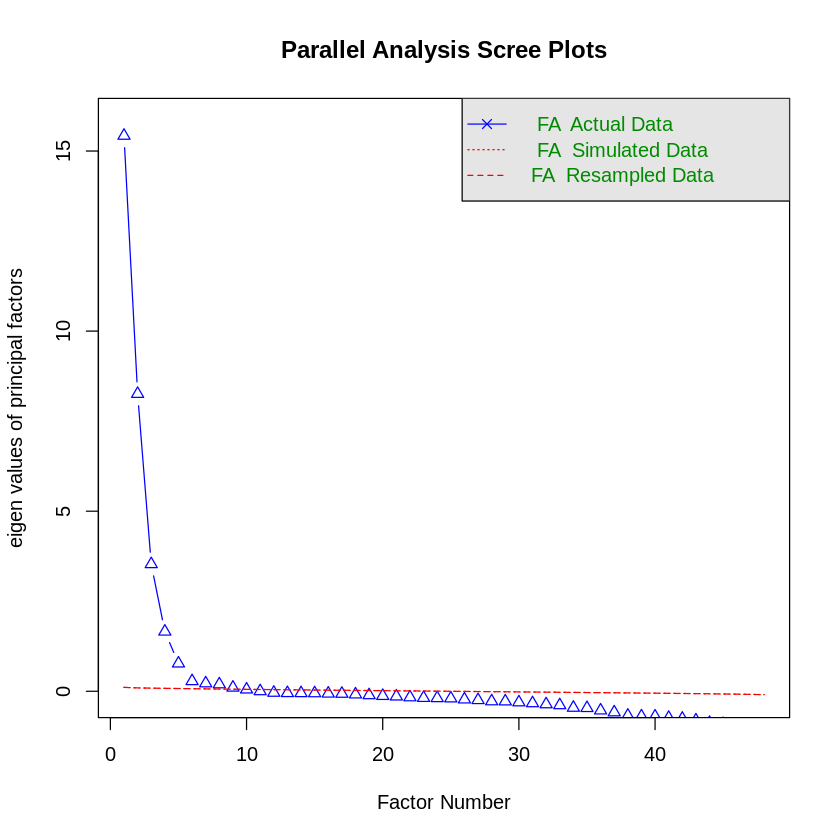

In [ ]:
#FA code
# Determine optimal number of factors
fa_parallel <- fa.parallel(skill_scaled, fm = "pa", fa = "fa", n.iter = 100)

# Perform Factor Analysis with 4 factors
fa_result <- fa(skill_scaled, nfactors = 4, rotate = "varimax", fm = "pa")

# Display results
print(fa_result, cut = 0.3)

# Extract factor scores
fa_scores <- as.data.frame(fa_result$scores)
colnames(fa_scores) <- paste0("Factor", 1:4)

cat("Factor Analysis completed with 4 factors")
print(fa_result$loadings, cutoff = 0.3)

# Problem 3-1: Fitting Unsupervised Clustering

In [ ]:
library(cluster)

In [ ]:
# K-means clustering
set.seed(123)
kmeans_original <- kmeans(skill_scaled, centers = 4, nstart = 25, iter.max = 100)
kmeans_pca <- kmeans(pc_scores, centers = 4, nstart = 25, iter.max = 100)
kmeans_fa <- kmeans(fa_scores, centers = 4, nstart = 25, iter.max = 100)

subset_idx <- sample(1:nrow(skill_scaled), 1000)

sil_original <- silhouette(kmeans_original$cluster[subset_idx],
                           dist(skill_scaled[subset_idx,]))
sil_pca <- silhouette(kmeans_pca$cluster[subset_idx],
                      dist(pc_scores[subset_idx,]))
sil_fa <- silhouette(kmeans_fa$cluster[subset_idx],
                     dist(fa_scores[subset_idx,]))

cat("Silhouette scores (higher = better clustering):\n")
cat("Original variables:", round(mean(sil_original[,3]), 3), "\n")
cat("PCA scores:", round(mean(sil_pca[,3]), 3), "\n")
cat("Factor scores:", round(mean(sil_fa[,3]), 3), "\n")

cat("\nWithin-cluster sum of squares (lower = better):\n")
cat("Original variables:", round(kmeans_original$tot.withinss, 0), "\n")
cat("PCA scores:", round(kmeans_pca$tot.withinss, 0), "\n")
cat("Factor scores:", round(kmeans_fa$tot.withinss, 0), "\n")

# Cluster sizes
cat("\nCluster sizes:\n")
cat("Original:", kmeans_original$size, "\n")
cat("PCA:", kmeans_pca$size, "\n")
cat("Factor:", kmeans_fa$size, "\n")


fifa_for_validation <- fifa22_df %>%
  select(player_positions, overall, potential, age, height_cm, weight_kg,
         skill_moves, attacking_crossing, attacking_finishing, attacking_heading_accuracy,
         attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve,
         skill_fk_accuracy, skill_long_passing, skill_ball_control,
         movement_acceleration, movement_sprint_speed, movement_agility,
         movement_reactions, movement_balance, power_shot_power, power_jumping,
         power_stamina, power_strength, power_long_shots, mentality_aggression,
         mentality_interceptions, mentality_positioning, mentality_vision,
         mentality_penalties, mentality_composure, defending_marking_awareness,
         defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving,
         goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning,
         goalkeeping_reflexes, pace, shooting, passing, dribbling, defending, physic) %>%
  drop_na() %>%
  mutate(
    position_group = case_when(
      player_positions %in% c("GK") ~ "GK",
      player_positions %in% c("RB", "LB", "CB", "RWB", "LWB") ~ "DEF",
      player_positions %in% c("CDM", "CM", "CAM", "LM", "RM") ~ "MID",
      player_positions %in% c("ST", "CF", "LW", "RW") ~ "FWD",
      TRUE ~ "Other"
    )
  ) %>%
  filter(position_group != "Other")

fifa_for_validation$cluster_pca <- kmeans_pca$cluster[1:nrow(fifa_for_validation)]
fifa_for_validation$cluster_fa <- kmeans_fa$cluster[1:nrow(fifa_for_validation)]

cat("PCA Clusters vs Football Positions:\n")
print(table(fifa_for_validation$position_group, fifa_for_validation$cluster_pca))

cat("\nFactor Clusters vs Football Positions:\n")
print(table(fifa_for_validation$position_group, fifa_for_validation$cluster_fa))

purity_pca <- sum(apply(table(fifa_for_validation$position_group, fifa_for_validation$cluster_pca), 2, max)) / nrow(fifa_for_validation)
purity_fa <- sum(apply(table(fifa_for_validation$position_group, fifa_for_validation$cluster_fa), 2, max)) / nrow(fifa_for_validation)

cat("\nCluster Purity (higher = better match to positions):\n")
cat("PCA clusters:", round(purity_pca, 3), "\n")
cat("Factor clusters:", round(purity_fa, 3), "\n")



Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 855350)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 855350)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 855350)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 855350)”


Silhouette scores (higher = better clustering):
Original variables: 0.138 
PCA scores: 0.187 
Factor scores: 0.185 

Within-cluster sum of squares (lower = better):
Original variables: 520820 
PCA scores: 355897 
Factor scores: 75170 

Cluster sizes:
Original: 3781 5017 4624 3685 
PCA: 4985 4624 3720 3778 
Factor: 3898 4324 4106 4779 
PCA Clusters vs Football Positions:
     
         1    2    3    4
  DEF 1164  264  341 1888
  FWD  638  157  203 1002
  MID  587  206  175  673

Factor Clusters vs Football Positions:
     
         1    2    3    4
  DEF  679  586  945 1447
  FWD  393  311  549  747
  MID  353  262  449  577

Cluster Purity (higher = better match to positions):
PCA clusters: 0.501 
Factor clusters: 0.501 


# Problem 3-2: Modeling Player Value & Wage

In [ ]:
base_model_data <- fifa22[complete_rows, ] %>%
  select(sofifa_id, short_name, age, overall, potential, value_eur, wage_eur)

In [ ]:
model_data_pca <- bind_cols(base_model_data, pc_scores[, 1:5])

model_data_value_pca <- model_data_pca %>%
  filter(value_eur > 0) %>%
  filter(value_eur < quantile(value_eur, 0.99, na.rm = TRUE))

value_model_all_pca <- lm(log(value_eur) ~ age + I(age^2) + potential + overall +
                      PC1 + PC2 + PC3 + PC4 + PC5, data = model_data_value_pca)

print(summary(value_model_all_pca))


Call:
lm(formula = log(value_eur) ~ age + I(age^2) + potential + overall + 
    PC1 + PC2 + PC3 + PC4 + PC5, data = model_data_value_pca)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78157 -0.11146 -0.02049  0.08780  0.97951 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.163e+00  8.746e-02 -13.293  < 2e-16 ***
age          2.814e-01  5.123e-03  54.921  < 2e-16 ***
I(age^2)    -6.429e-03  8.684e-05 -74.036  < 2e-16 ***
potential    4.836e-02  8.057e-04  60.022  < 2e-16 ***
overall      1.334e-01  9.109e-04 146.449  < 2e-16 ***
PC1         -1.885e-02  7.789e-04 -24.208  < 2e-16 ***
PC2         -9.704e-04  8.587e-04  -1.130    0.258    
PC3         -5.700e-03  7.265e-04  -7.845 4.57e-15 ***
PC4          1.092e-02  1.172e-03   9.318  < 2e-16 ***
PC5         -3.325e-02  2.071e-03 -16.056  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1769 on 16852 degrees of freedom
Multiple 

In [ ]:
young_players_data_value_pca <- model_data_value_pca %>% filter(age < 24)

value_model_young_pca <- lm(log(value_eur) ~ age + I(age^2) + potential + overall +
                        PC1 + PC2 + PC3 + PC4 + PC5, data = young_players_data_value_pca)

print(summary(value_model_young_pca))


Call:
lm(formula = log(value_eur) ~ age + I(age^2) + potential + overall + 
    PC1 + PC2 + PC3 + PC4 + PC5, data = young_players_data_value_pca)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41960 -0.07698 -0.00127  0.06438  0.75756 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.1471029  0.2378528  -4.823 1.45e-06 ***
age          0.3362790  0.0224997  14.946  < 2e-16 ***
I(age^2)    -0.0078865  0.0005470 -14.419  < 2e-16 ***
potential    0.0377416  0.0007649  49.345  < 2e-16 ***
overall      0.1377876  0.0009272 148.599  < 2e-16 ***
PC1         -0.0110148  0.0010276 -10.719  < 2e-16 ***
PC2         -0.0002785  0.0010430  -0.267  0.78945    
PC3         -0.0025978  0.0009704  -2.677  0.00745 ** 
PC4          0.0076045  0.0016093   4.725 2.34e-06 ***
PC5         -0.0111308  0.0028575  -3.895 9.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1393 on 7024 degrees of freedom
Mu

In [ ]:
model_data_wage_pca <- model_data_pca %>%
  filter(wage_eur > 0) %>%
  filter(wage_eur < quantile(wage_eur, 0.99, na.rm = TRUE))

In [ ]:
wage_model_all_pca <- lm(log(wage_eur) ~ age + I(age^2) + potential + overall +
                      PC1 + PC2 + PC3 + PC4 + PC5, data = model_data_wage_pca)
print(summary(wage_model_all_pca))


Call:
lm(formula = log(wage_eur) ~ age + I(age^2) + potential + overall + 
    PC1 + PC2 + PC3 + PC4 + PC5, data = model_data_wage_pca)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5743 -0.4509  0.0691  0.5391  3.6685 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.370922   0.395132 -13.593  < 2e-16 ***
age          0.333044   0.022741  14.645  < 2e-16 ***
I(age^2)    -0.006077   0.000383 -15.868  < 2e-16 ***
potential    0.037767   0.003705  10.193  < 2e-16 ***
overall      0.097132   0.004208  23.085  < 2e-16 ***
PC1         -0.038040   0.003647 -10.432  < 2e-16 ***
PC2          0.029196   0.004017   7.267 3.82e-13 ***
PC3         -0.033099   0.003399  -9.737  < 2e-16 ***
PC4          0.002602   0.005479   0.475    0.635    
PC5         -0.043978   0.009726  -4.522 6.17e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8274 on 16866 degrees of freedom
Multiple R-squared:  0.6022,	Adj

In [ ]:
young_players_data_wage_pca <- model_data_wage_pca %>% filter(age < 24)

wage_model_young_pca <- lm(log(wage_eur) ~ age + I(age^2) + potential + overall +
                        PC1 + PC2 + PC3 + PC4 + PC5, data = young_players_data_wage_pca)

print(summary(wage_model_young_pca))


Call:
lm(formula = log(wage_eur) ~ age + I(age^2) + potential + overall + 
    PC1 + PC2 + PC3 + PC4 + PC5, data = young_players_data_wage_pca)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2198 -0.5125 -0.0054  0.5363  2.5157 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.640323   1.349209 -12.333  < 2e-16 ***
age           1.490845   0.127637  11.680  < 2e-16 ***
I(age^2)     -0.033286   0.003103 -10.728  < 2e-16 ***
potential     0.038690   0.004334   8.926  < 2e-16 ***
overall       0.079970   0.005255  15.218  < 2e-16 ***
PC1          -0.027785   0.005822  -4.772 1.86e-06 ***
PC2           0.007671   0.005912   1.298  0.19448    
PC3          -0.031722   0.005501  -5.767 8.43e-09 ***
PC4           0.010059   0.009095   1.106  0.26873    
PC5          -0.060336   0.016159  -3.734  0.00019 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7913 on 7053 degrees of freedom
Multiple R-squ

In [ ]:
model_data_fa <- bind_cols(base_model_data, fa_scores[, 1:4])


In [ ]:
model_data_value_fa <- model_data_fa %>%
  filter(value_eur > 0) %>%
  filter(value_eur < quantile(value_eur, 0.99, na.rm = TRUE))

value_model_all_fa <- lm(log(value_eur) ~ age + I(age^2) + potential + overall +
                         Factor1 + Factor2 + Factor3 + Factor4, data = model_data_value_fa)

print(summary(value_model_all_fa))


Call:
lm(formula = log(value_eur) ~ age + I(age^2) + potential + overall + 
    Factor1 + Factor2 + Factor3 + Factor4, data = model_data_value_fa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79705 -0.11228 -0.02124  0.08892  1.07353 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.634e+00  7.889e-02  -20.71   <2e-16 ***
age          2.715e-01  5.182e-03   52.40   <2e-16 ***
I(age^2)    -6.318e-03  8.765e-05  -72.08   <2e-16 ***
potential    5.219e-02  7.835e-04   66.61   <2e-16 ***
overall      1.391e-01  8.311e-04  167.33   <2e-16 ***
Factor1      2.906e-02  1.606e-03   18.09   <2e-16 ***
Factor2     -1.931e-02  1.149e-03  -16.81   <2e-16 ***
Factor3     -9.025e-04  1.236e-03   -0.73    0.465    
Factor4      1.004e-02  9.459e-04   10.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1808 on 16853 degrees of freedom
Multiple R-squared:  0.9746,	Adjusted R-squared:  0.974

In [ ]:
young_players_data_value_fa <- model_data_value_fa %>% filter(age < 24)

value_model_young_fa <- lm(log(value_eur) ~ age + I(age^2) + potential + overall +
                           Factor1 + Factor2 + Factor3 + Factor4, data = young_players_data_value_fa)

print(summary(value_model_young_fa))


Call:
lm(formula = log(value_eur) ~ age + I(age^2) + potential + overall + 
    Factor1 + Factor2 + Factor3 + Factor4, data = young_players_data_value_fa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44621 -0.07780 -0.00270  0.06528  0.76167 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.3862919  0.2360543  -5.873 4.48e-09 ***
age          0.3295539  0.0226799  14.531  < 2e-16 ***
I(age^2)    -0.0077436  0.0005515 -14.042  < 2e-16 ***
potential    0.0394626  0.0006984  56.502  < 2e-16 ***
overall      0.1408089  0.0007640 184.311  < 2e-16 ***
Factor1      0.0166117  0.0020026   8.295  < 2e-16 ***
Factor2     -0.0102783  0.0013960  -7.363 2.00e-13 ***
Factor3     -0.0005754  0.0015236  -0.378    0.706    
Factor4      0.0056596  0.0012159   4.655 3.30e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1405 on 7025 degrees of freedom
Multiple R-squared:  0.9836,	Adjusted R-squared:

In [ ]:
model_data_wage_fa <- model_data_fa %>%
  filter(wage_eur > 0) %>%
  filter(wage_eur < quantile(wage_eur, 0.99, na.rm = TRUE))

In [ ]:
wage_model_all_fa <- lm(log(wage_eur) ~ age + I(age^2) + potential + overall +
                        Factor1 + Factor2 + Factor3 + Factor4, data = model_data_wage_fa)

print(summary(wage_model_all_fa))


Call:
lm(formula = log(wage_eur) ~ age + I(age^2) + potential + overall + 
    Factor1 + Factor2 + Factor3 + Factor4, data = model_data_wage_fa)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5446 -0.4506  0.0690  0.5389  3.6157 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.6040133  0.3471699 -19.022  < 2e-16 ***
age          0.3196499  0.0225797  14.157  < 2e-16 ***
I(age^2)    -0.0057980  0.0003796 -15.274  < 2e-16 ***
potential    0.0441783  0.0035416  12.474  < 2e-16 ***
overall      0.1112386  0.0037535  29.636  < 2e-16 ***
Factor1      0.0534292  0.0073738   7.246 4.48e-13 ***
Factor2     -0.0136461  0.0052816  -2.584  0.00978 ** 
Factor3      0.0339589  0.0056761   5.983 2.24e-09 ***
Factor4     -0.0139070  0.0043476  -3.199  0.00138 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8309 on 16867 degrees of freedom
Multiple R-squared:  0.5988,	Adjusted R-squared:  0.5986 
F-statist

In [ ]:
young_players_data_wage_fa <- model_data_wage_fa %>% filter(age < 24)

wage_model_young_fa <- lm(log(wage_eur) ~ age + I(age^2) + potential + overall +
                          Factor1 + Factor2 + Factor3 + Factor4, data = young_players_data_wage_fa)

print(summary(wage_model_young_fa))



Call:
lm(formula = log(wage_eur) ~ age + I(age^2) + potential + overall + 
    Factor1 + Factor2 + Factor3 + Factor4, data = young_players_data_wage_fa)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.11826 -0.51340 -0.00736  0.54195  2.49929 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.366432   1.333241 -13.026  < 2e-16 ***
age           1.464778   0.128090  11.435  < 2e-16 ***
I(age^2)     -0.032759   0.003114 -10.519  < 2e-16 ***
potential     0.046264   0.003945  11.728  < 2e-16 ***
overall       0.087810   0.004295  20.442  < 2e-16 ***
Factor1       0.041230   0.011298   3.649 0.000265 ***
Factor2      -0.029052   0.007879  -3.687 0.000228 ***
Factor3       0.023928   0.008596   2.784 0.005391 ** 
Factor4      -0.007065   0.006867  -1.029 0.303600    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7945 on 7054 degrees of freedom
Multiple R-squared:  0.5632,	Adjusted R-squared:  